> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Overview
To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

Question that can analyised from this data set
1-What is the average Budget
2-What was the average (mean) budget of release date
3-How many unique original title are there
4-what are the top 5 most common genres
5-average runtime of the movies
6-Movies which had most and least profit
 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import csv
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: After understanding the dataset and the questions proposed for analysis, we will retain the data that will help us answer the questions and delete the non-remaining data so that we can make our account easy and understandable. ..**



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#read data 
df = pd.read_csv("tmdb-movies.csv")
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 Obsevations
1- No unit of currency is mentioned in the dataset. So for my analysis I will take it as dollar as it is the most used international currency.

2- vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count




### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

Important observation regarding this process

We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
Removing the duplicates in the rows(if any).
Some movies in the dataset have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries
Changing release date column into date format.
Replacing zero with NAN in runtime column.
Changing format of release_date and revenue column.

# 1. Removing Unused columns

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#drop columns 
df.drop(columns={'id'},inplace=True)
df.drop(columns={'imdb_id'},inplace=True)
df.drop(columns={'popularity'},inplace=True)
df.drop(columns={'budget_adj'},inplace=True)
df.drop(columns={'revenue_adj'},inplace=True)
df.drop(columns={'homepage'},inplace=True)
df.drop(columns={'keywords'},inplace=True)
df.drop(columns={'overview'},inplace=True)
df.drop(columns={'production_companies'},inplace=True)
df.drop(columns={'vote_count'},inplace=True)
df.drop(columns={'vote_average'},inplace= True)
df.drop(columns={"cast"},inplace =True)
df.drop(columns={"release_year"} ,inplace=True)
df.drop(columns={"tagline"} ,inplace=True)

df

,budget,revenue,original_title,director,runtime,genres,release_date
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15
...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/66
10862,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/66
10863,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/66
10864,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/66


#Lets see how many entries we have in the database

# Know the dimensions

In [4]:
df.shape  #Know the dimensions

(10866, 7)

# know the data

In [5]:
df.info()  #know the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   director        10822 non-null  object
 4   runtime         10866 non-null  int64 
 5   genres          10843 non-null  object
 6   release_date    10866 non-null  object
dtypes: int64(3), object(4)
memory usage: 594.4+ KB


# Knowledge of statistical information

In [6]:
df.describe() #Knowledge of statistical information

,budget,revenue,runtime
count,1.086600e+04,1.086600e+04,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863
std,3.091321e+07,1.170035e+08,31.381405
min,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,90.000000
50%,0.000000e+00,0.000000e+00,99.000000
75%,1.500000e+07,2.400000e+07,111.000000
max,4.250000e+08,2.781506e+09,900.000000




By looking at   calculations, we can conclude that..

25% of movies have a runtime of less than 90 minutes
50% of movies have a runtime of less than 99 minutes. (median)
75% of movies have a runtime of less than 111 minutes

# know duplicated

In [7]:
df.duplicated().sum()  # know duplicated

1

# Now removing the duplicate rows if any!

In [8]:
df.drop_duplicates(keep = 'first' , inplace= True)  # drop duplicates
df

,budget,revenue,original_title,director,runtime,genres,release_date
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15
...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/66
10862,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/66
10863,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/66
10864,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/66


#So there was a duplicate row and it has been removed  now

In [9]:
df.duplicated().sum()

0

# Changing the release date column into standard date format

In [10]:
df["release_date"]=pd.to_datetime(df["release_date"])  
df["release_date"]  #changing data type


0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

# Replacing zero with NAN in runtime column

In [11]:
df.replace(['NA','Missing'],np.nan,inplace=True)
df

,budget,revenue,original_title,director,runtime,genres,release_date
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01
...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Bruce Brown,95,Documentary,2066-06-15
10862,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,2066-12-21
10863,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,2066-01-01
10864,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,2066-11-02


# drop missing

In [12]:
df.dropna(axis = 0, how='any' ,inplace=True)  #drop missing
df

,budget,revenue,original_title,director,runtime,genres,release_date
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01
...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Bruce Brown,95,Documentary,2066-06-15
10862,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,2066-12-21
10863,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,2066-01-01
10864,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,2066-11-02


In [13]:
df.info() ## printing the changed info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10799 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          10799 non-null  int64         
 1   revenue         10799 non-null  int64         
 2   original_title  10799 non-null  object        
 3   director        10799 non-null  object        
 4   runtime         10799 non-null  int64         
 5   genres          10799 non-null  object        
 6   release_date    10799 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 674.9+ KB


So there was a duplicate  row and it has been removed now.
No missing data and changing data type

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What is the Maximum Budget?!)

In [14]:
#Find the average budget
df['budget'].max()


425000000

#So the maximum budget a movie is 425000000 . Lets analyse it 

### Research Question 2  (What was the average (mean) budget of  release date  ?)

In [15]:
#Know the average budget during the release date by finding a function groupby
df.groupby('release_date').mean()['budget']


release_date
1972-01-01    4.500000e+04
1972-01-13    0.000000e+00
1972-02-13    6.000000e+06
1972-02-15    0.000000e+00
1972-03-09    3.333333e+05
                  ...     
2071-12-14    0.000000e+00
2071-12-18    2.200000e+06
2071-12-20    1.200000e+06
2071-12-22    4.000000e+06
2071-12-29    2.200000e+06
Name: budget, Length: 5885, dtype: float64

#from this Note in 1-1-1972 The budget was equal to 4.5

### Research Question 3 (How many unique original  title   are there?)

In [16]:
#Knowing the names of unique movies
df['original_title'].nunique() 

10506

note the unique equal 10506

### Research Question 4 (what are the top 5 most common genres?)

In [17]:
#knowing the top 5 common genres?
df['genres'].value_counts()

Drama                                        711
Comedy                                       707
Documentary                                  306
Drama|Romance                                289
Comedy|Drama                                 280
                                            ... 
Animation|Family|Fantasy|Adventure|Comedy      1
Mystery|Action|Adventure|Horror                1
Comedy|Crime|Romance|Drama                     1
Crime|Adventure|Action|Comedy|Thriller         1
Adventure|Fantasy|Horror|Action|Thriller       1
Name: genres, Length: 2031, dtype: int64

common genre : Action, Adventure, Thriller, Comedy, Drama.

### Research Question 5  (Minimum runtime of the movies?)


In [18]:
#Find the average runtime
df['runtime'].min()

0

So the average runtime a movie is 102 minutes. Lets analyse it in a visual form i.e. by graphical approach

# Research Question 6 ( Movies which had most and least profit?)

In [19]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.iloc[2226])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.iloc[30])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('budget')

,2244,30
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
director,Sngmoo Lee,Bill Condon
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00


Column with id 2244 shows the highest earned budget i.e 425000000 .

Whereas the column with id 30 shows the lowest earned budget i.e 30

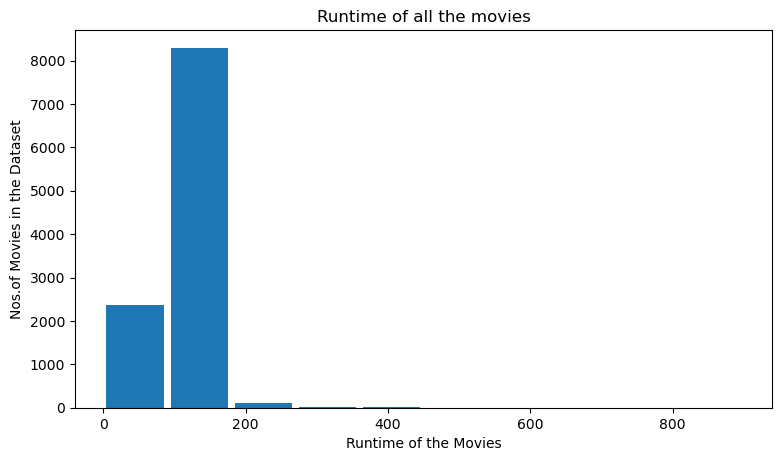

In [20]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies')
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset')
#Name of the graph
plt.title('Runtime of all the movies')

#displaying histogram plot
plt.hist(df['runtime'], rwidth = 0.9)
#display the plot
plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 0 to 118 minutes. Almost 5500 and more no.of movies fall in this criteria.

<AxesSubplot:ylabel='runtime'>

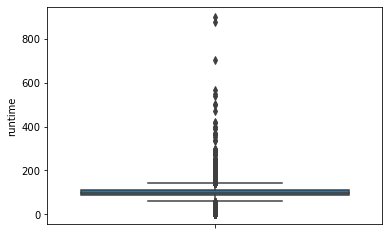

In [21]:
#The First plot is box plot of the runtime of the movies by using seaborn
sb.boxplot(y='runtime' , data = df)

By looking at the plot , we can conclude that..

25% of movies have a runtime of less than 90 minutes 50% of movies have a runtime of less than 99 minutes. (median) 75% of movies have a runtime of less than 111 minutes

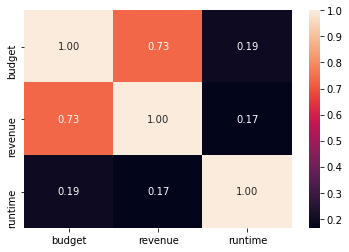

In [22]:
#a heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.
plt.figure()
sb.heatmap(df.corr(), annot = True, fmt='.2f' )
plt.show()

by looking at the heatmap ,we can conclude that
The strength of the correlation between budget and movie time equal 0.19

# Conclusions

This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:

For a Movie to be in successful criteria

Maximum Budget should be around 425000000 millon dollar
the average (mean) budget of release date round 3.3
the unique orginal title equal 10506
Genre must be : Action, Adventure, Thriller, Comedy, Drama.
Minimum duration of the movie should be 0 minutes
Column with id 2244 shows the highest earned budget i.e 425000000 .
Whereas the column with id 30 shows the lowest earned budget i.e 30
25% of movies have a runtime of less than 90 minutes 50% of movies have a runtime of less than 99 minutes. (median) 75% of movies have a runtime of less than 111 minutes



In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1